# Diabetes Case Prediction
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly `$327` billion dollars and total costs with undiagnosed diabetes and prediabetes approaching `$400` billion dollars annually.

In [ ]:
import pandas as pd
import requests
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
orig_url="https://drive.google.com/file/d/1UlPmNQqOdVZnqsvXEFPqJccd0L434v6w/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
data.columns()

### Missing Values

In [ ]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
num_cols = []
# data.describe().T
columns = data.columns

# for col in columns:
#   print(col)
#   print(data[col])
#   print(col, ":", data[col].unique())

cat_cols = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
num_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

### Descriptive Analysis on Numerical Variables

In [ ]:
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
GenHlth,253680.0,2.511392,1.068477,1.0,2.0,2.0,3.0,5.0
MentHlth,253680.0,3.184772,7.412847,0.0,0.0,0.0,2.0,30.0
PhysHlth,253680.0,4.242081,8.717951,0.0,0.0,0.0,3.0,30.0
Age,253680.0,8.032119,3.054220,1.0,6.0,8.0,10.0,13.0
Education,253680.0,5.050434,0.985774,1.0,4.0,5.0,6.0,6.0
Income,253680.0,6.053875,2.071148,1.0,5.0,7.0,8.0,8.0


### Exploring these variables with Distribution

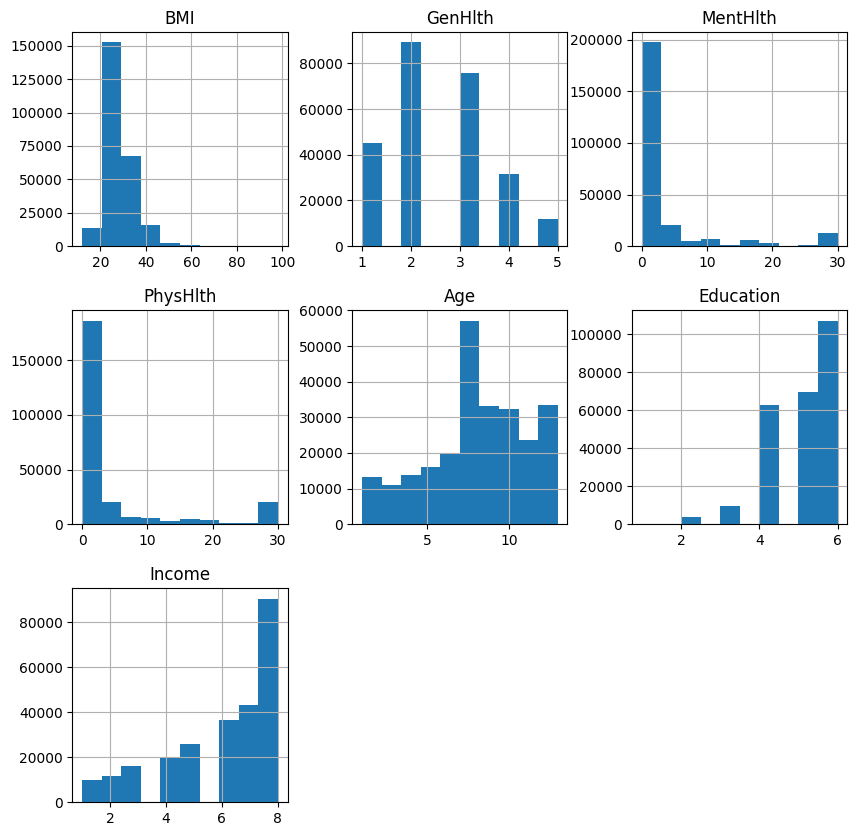

In [ ]:
data[num_cols].hist(figsize=(10,10))
plt.show()

Observations -
1. **Body Mass Index (BMI)**: Most values fall below 40, and the distribution is right-skewed. This suggests that fewer people are in the higher BMI categories and that the majority of the dataset's participants have BMIs between normal and moderately overweight.

 The majority of the distribution lies in the range of 20 to 30, which conventional BMI categories classify as normal to slightly overweight. There is some variation in body weight among the sampled population, nevertheless, as seen by the presence of certain individuals in the dataset with BMIs significantly higher than 30, placing them in the obese category.

2. **GenHlth (General Health)**: This looks to be numerically encoded category data with values between 1 and 5. If we assume that 1 is "poor" and 5 is "excellent," the distribution has two modes at 2 and 3, indicating that most participants assessed their general health as either "fair" or "good."

 There is a notable amount of responses in categories 4 and 5, despite a notable concentration of responses in the 2 and 3 categories. This implies that even while the majority of people report fair to good general health, a significant percentage of the population nevertheless reports low to very poor health.

3. **MentHlth (Mental Health)**: The distribution is heavily right-skewed with a peak at 0, indicating that a large number of individuals reported no days of poor mental health. There are progressively fewer individuals reporting a higher number of poor mental health days.

 While a large proportion of individuals report zero days of mental health issues, the long tail to the right indicates that there's a subset of the population experiencing a significant number of days with mental health issues, possibly suggesting a smaller group within the population with chronic mental health problems.

4. **PhysHlth (Physical Health)**: Similar to Mental Health, this distribution is right-skewed with a peak at 0. This suggests that most individuals did not report days of poor physical health, with a smaller number reporting more days.

 There's a secondary, smaller peak between 1 and 5 days of physical health issues, which might indicate that a non-negligible number of individuals experience short-term physical health problems, perhaps common illnesses like flu or temporary conditions.

5. **Age**: The histogram shows a somewhat right-skewed distribution with multiple peaks, indicating that certain age groups are more prevalent in the dataset. It seems like there's a significant number of young adults (peaks possibly at ages 20 and 25) and then smaller groups of older adults.

 The distribution suggests a younger-skewed population but with a significant representation across a range of ages. There is less representation of individuals in the middle-age range, and a slight increase again in the older age categories, which may suggest participation from both younger and retirement-age adults.

6. **Education**: This data appears to be categorical, represented numerically, likely ranging from 1 (no high school) to 6 (advanced degree). There are peaks at levels 4 and 6, suggesting that the highest number of individuals in the dataset have completed an undergraduate degree or have advanced degrees.

 There's a noticeable gap between the higher education categories (4 and 6) and the lower ones (2 and 3), implying a polarization in educational attainment: a significant number of individuals have either completed only some high school/no college or have gone on to complete a full college education and beyond.

7. **Income**: This histogram shows that a large number of individuals fall into the higher income categories (likely 7 and 8, assuming these represent higher income brackets). The distribution is left-skewed, indicating fewer people in the lower income brackets.

 The smallest number of individuals appear to be in the mid-income categories, with the greatest numbers in the highest category. This might suggest that the dataset includes a higher proportion of well-off individuals, which could skew the results of any health-related analysis if income correlates with health outcomes.

### Univariate Analysis on Categorical Variables

In [ ]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('*'*50)

0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: Diabetes_012, dtype: float64
**************************************************
0.0    0.570999
1.0    0.429001
Name: HighBP, dtype: float64
**************************************************
0.0    0.575879
1.0    0.424121
Name: HighChol, dtype: float64
**************************************************
1.0    0.96267
0.0    0.03733
Name: CholCheck, dtype: float64
**************************************************
0.0    0.556831
1.0    0.443169
Name: Smoker, dtype: float64
**************************************************
0.0    0.959429
1.0    0.040571
Name: Stroke, dtype: float64
**************************************************
0.0    0.905814
1.0    0.094186
Name: HeartDiseaseorAttack, dtype: float64
**************************************************
1.0    0.756544
0.0    0.243456
Name: PhysActivity, dtype: float64
**************************************************
1.0    0.634256
0.0    0.365744
Name: Fruits, dtype: float6

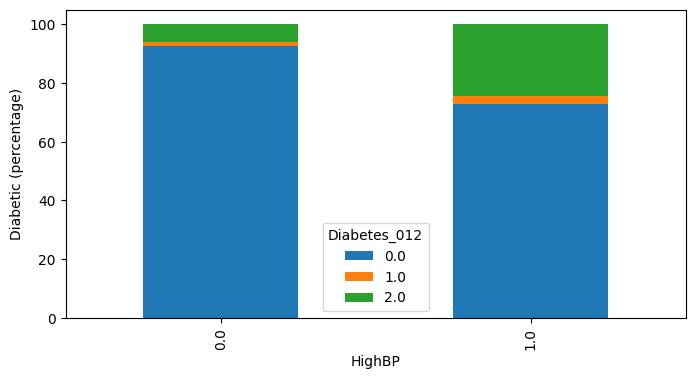

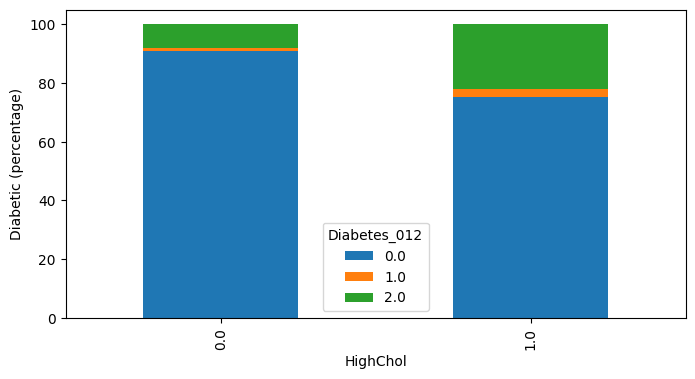

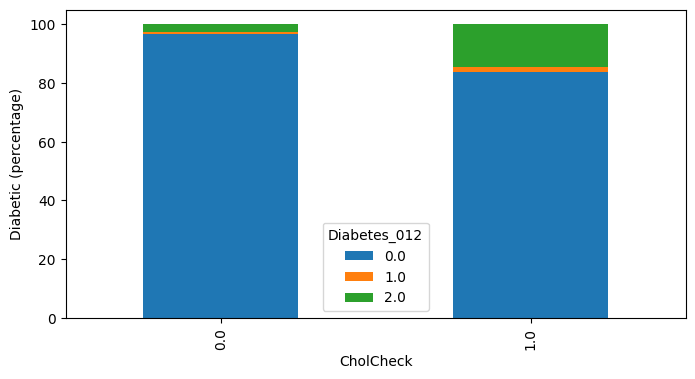

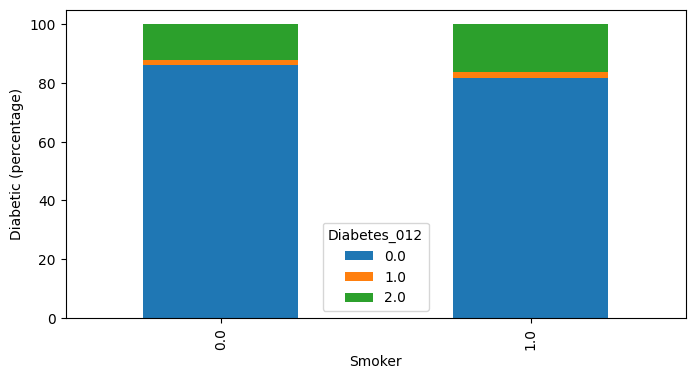

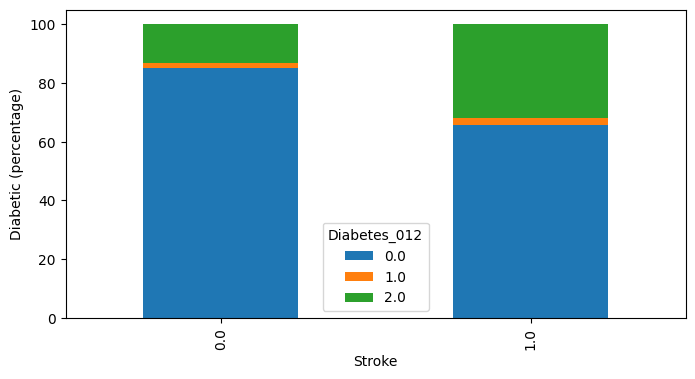

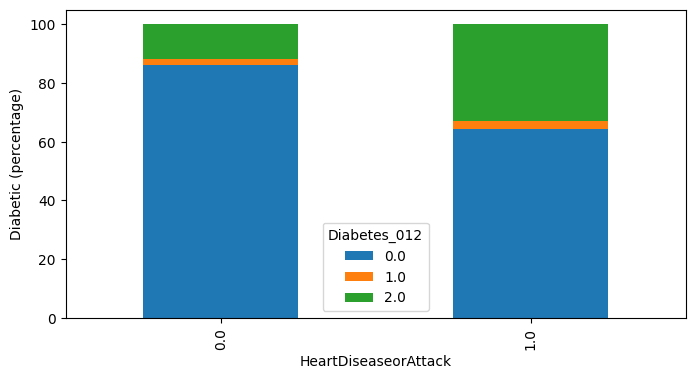

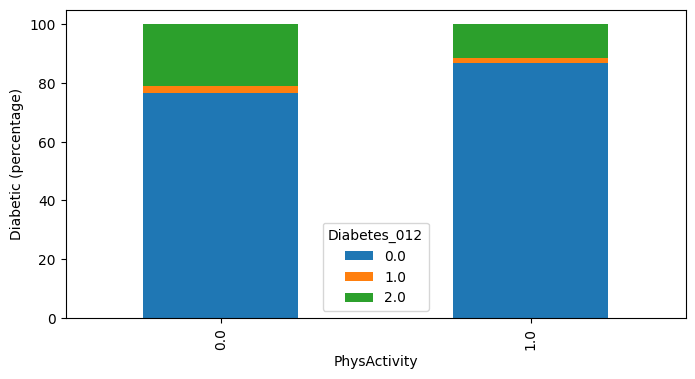

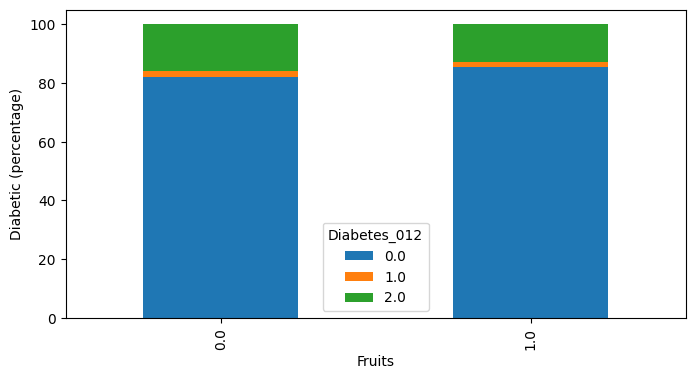

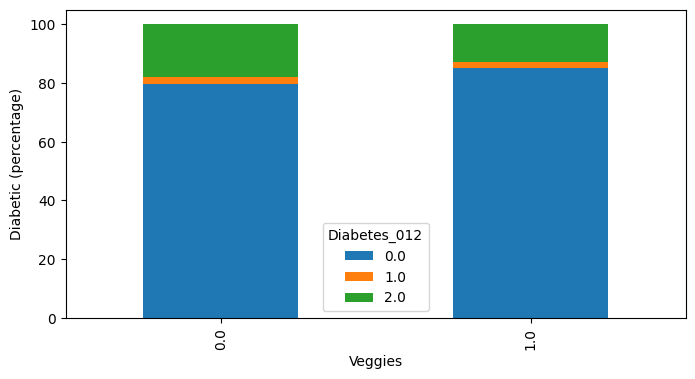

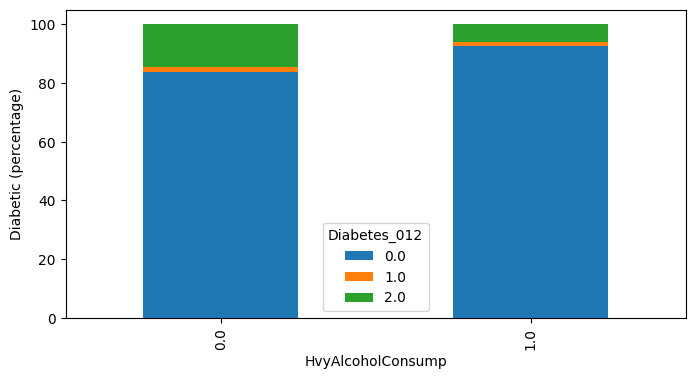

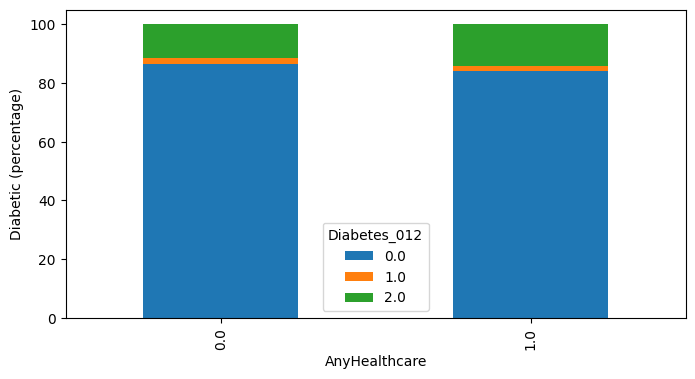

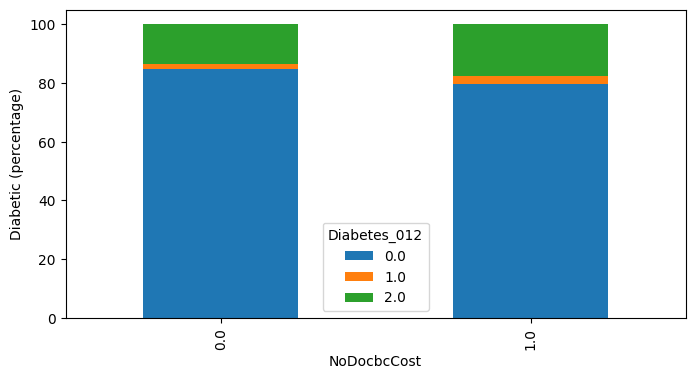

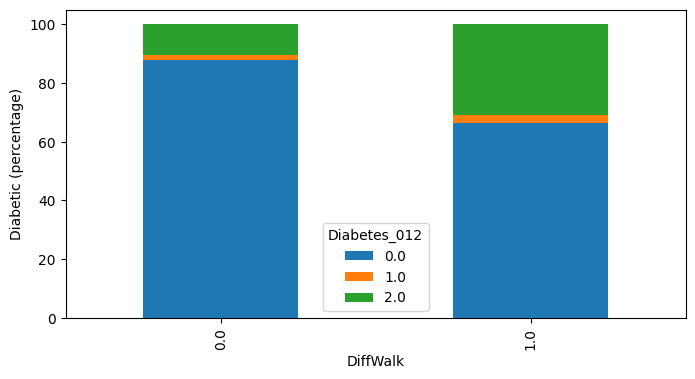

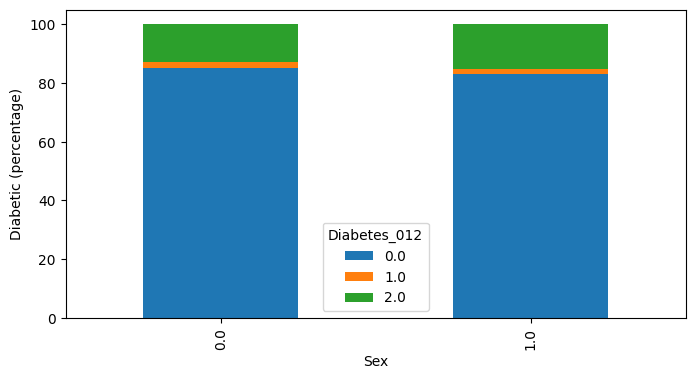

In [ ]:
for i in cat_cols:
    if i!='Diabetes_012':
        (pd.crosstab(data[i],data['Diabetes_012'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Diabetic (percentage)')

### Checking the relationship between Diabetic and numbereicxal variables

In [ ]:
data.groupby(['Diabetes_012'])[num_cols].mean()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
Diabetes_012,,,,,,,
0.0,27.742521,2.372391,2.944404,3.582416,7.786559,5.106629,6.208663
1.0,30.724466,2.975599,4.529907,6.348305,9.083351,4.784496,5.351112
2.0,31.944011,3.290981,4.461806,7.954479,9.379053,4.745516,5.210094


### Plotting the Correlation Matrix for all variables

<Axes: >

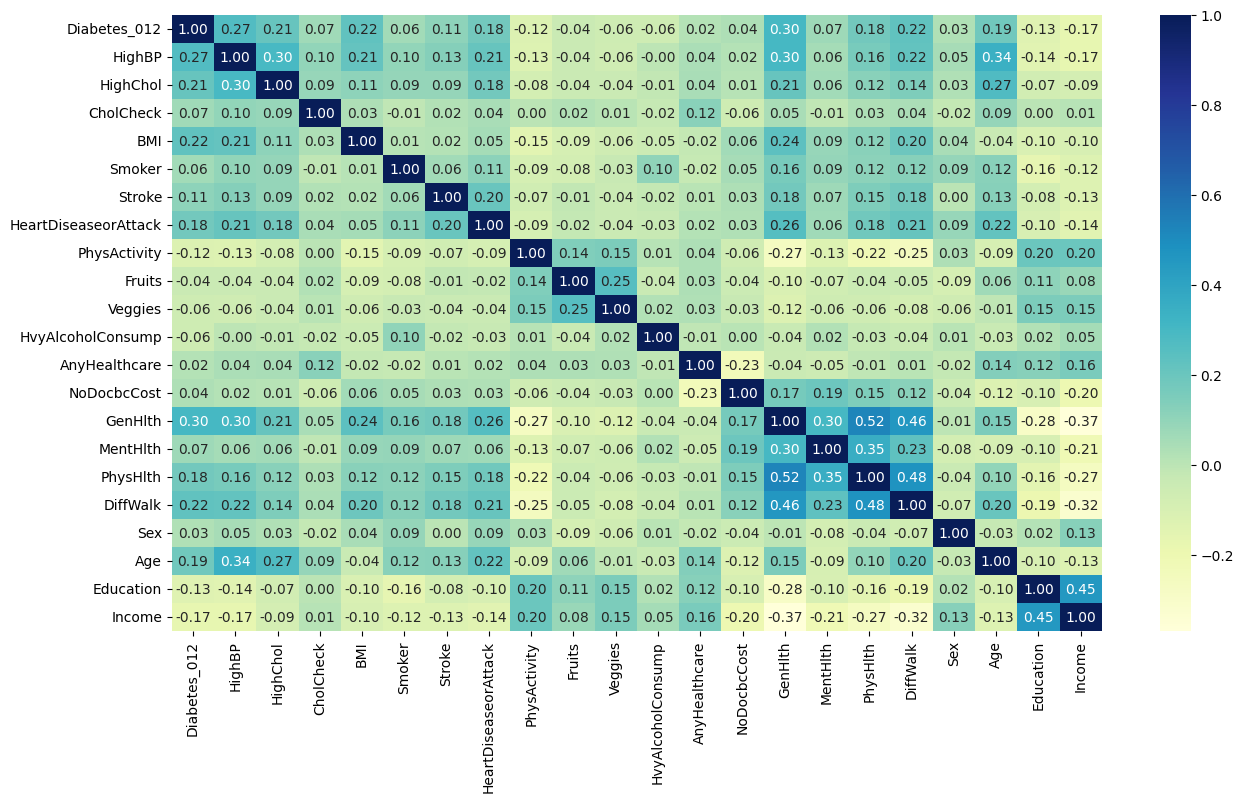

In [ ]:
# plotting the correation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

1. **Strength of Association:** The correlation coefficient values (ranging from -1 to 1) depicted in the heatmap allow you to determine the strength and direction of the linear relationships between pairs of variables. A value close to 1 indicates a strong positive correlation, meaning that as one variable increases, the other variable tends to also increase. Conversely, a value close to -1 indicates a strong negative correlation, where one variable increases as the other decreases. Values near 0 suggest a weak or no linear relationship.

2. **Direction of the Relationship:** Positive values indicate a positive relationship between variables, while negative values indicate a negative relationship. This is crucial for understanding how variables move in relation to each other.
Identifying Highly Correlated Variables: The heatmap makes it easy to spot variables with high positive or negative correlations. These are represented by darker shades of the color scheme used (in this case, 'YlGnBu'). For example, if two variables show a correlation coefficient of 0.9, it suggests they move almost in tandem in a positive direction.

3. **Multicollinearity:** In the context of regression analysis, highly correlated predictors (independent variables) can lead to multicollinearity, which can affect the model's estimates. Observing the correlation matrix helps in identifying these pairs of variables early, allowing for adjustments such as removing or combining variables to mitigate the issue.

4. **Variable Selection for Modeling:** By identifying variables that have strong correlations with the target variable (and weaker correlations among themselves), you can select a subset of variables that are likely to be good predictors for modeling purposes.

5. **Heatmap:** The use of the 'annot=True' option in your code annotates the heatmap with the correlation coefficients, making it easier to interpret. The 'fmt='0.2f'' option formats these annotations to two decimal places. The choice of the 'YlGnBu' colormap provides a visually appealing gradient from yellow (lower correlation) through green to blue (higher correlation), which helps in quickly identifying varying degrees of correlation.

6. **Missing Relationships Among Non-Numerical Variables:** It's important to note that this method only captures linear relationships between numerical variables. Non-linear relationships or associations between categorical variables are not depicted in this correlation matrix.